In [289]:
import pandas as pd
from cloudmesh.common.Shell import Shell
from cloudmesh.common.util import readfile
from cloudmesh.common.util import path_expand
from cloudmesh.common.systeminfo import os_is_windows
import matplotlib.dates as mdates
import os
from io import StringIO
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import yfinance as yf
import datetime as dt

In [290]:
dpi=300
filename = path_expand("benchmarks/jp-3600-GTX1660.log")
print(filename)

benchmarks\jp-3600-GTX1660.log


In [291]:
Shell.ls(filename)

['benchmarks\\jp-3600-GTX1660.log']

In [292]:
list_of_cryptos = ["EOS", "BTC", "ETH", "DOGE"]
expanded_cryptos = ["EOS-USD", "BTC-USD", "ETH-USD", "DOGE-USD"]

In [293]:
def getdf(crypto):
    ticker = yf.Ticker(crypto)
    data = ticker.history(period="max", interval="1d")
    return data


In [294]:
def ticker_plot(crypto):
    ticker = yf.Ticker(crypto)
    data = ticker.history(period="max", interval="1d")
    # print(data)
    # Sort the dataframe according to the date
    data.sort_values('Date', inplace=True, ascending=True)

    # Print the dataframe top

    data.head()

    # Visualization of data. Plotting the price close.
    plt.figure(num=None, figsize=(7, 4), dpi=300, facecolor='w', edgecolor='k')
    days = mdates.drange(data.index.min(), data.index.max() + dt.timedelta(days=1), dt.timedelta(days=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
    if len(days) > len(data['Close']):
        plt.plot(days[:-1], data['Close'])
    elif len(days) < len(data['Close']):
        plt.plot(days, data['Close'].iloc[:-1])
    else:
        plt.plot(days, data['Close'])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.grid()
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['font.size'] = 10
    plt.ylabel('Closing Price in USD')
    plt.xlabel('Date')
    plt.tight_layout()
    # plt.savefig(fullpath3, dpi=300, facecolor="#FFFFFF")
    #plt.savefig(pdfpath3, dpi=300)
    plt.show()

    print(data.index[0])

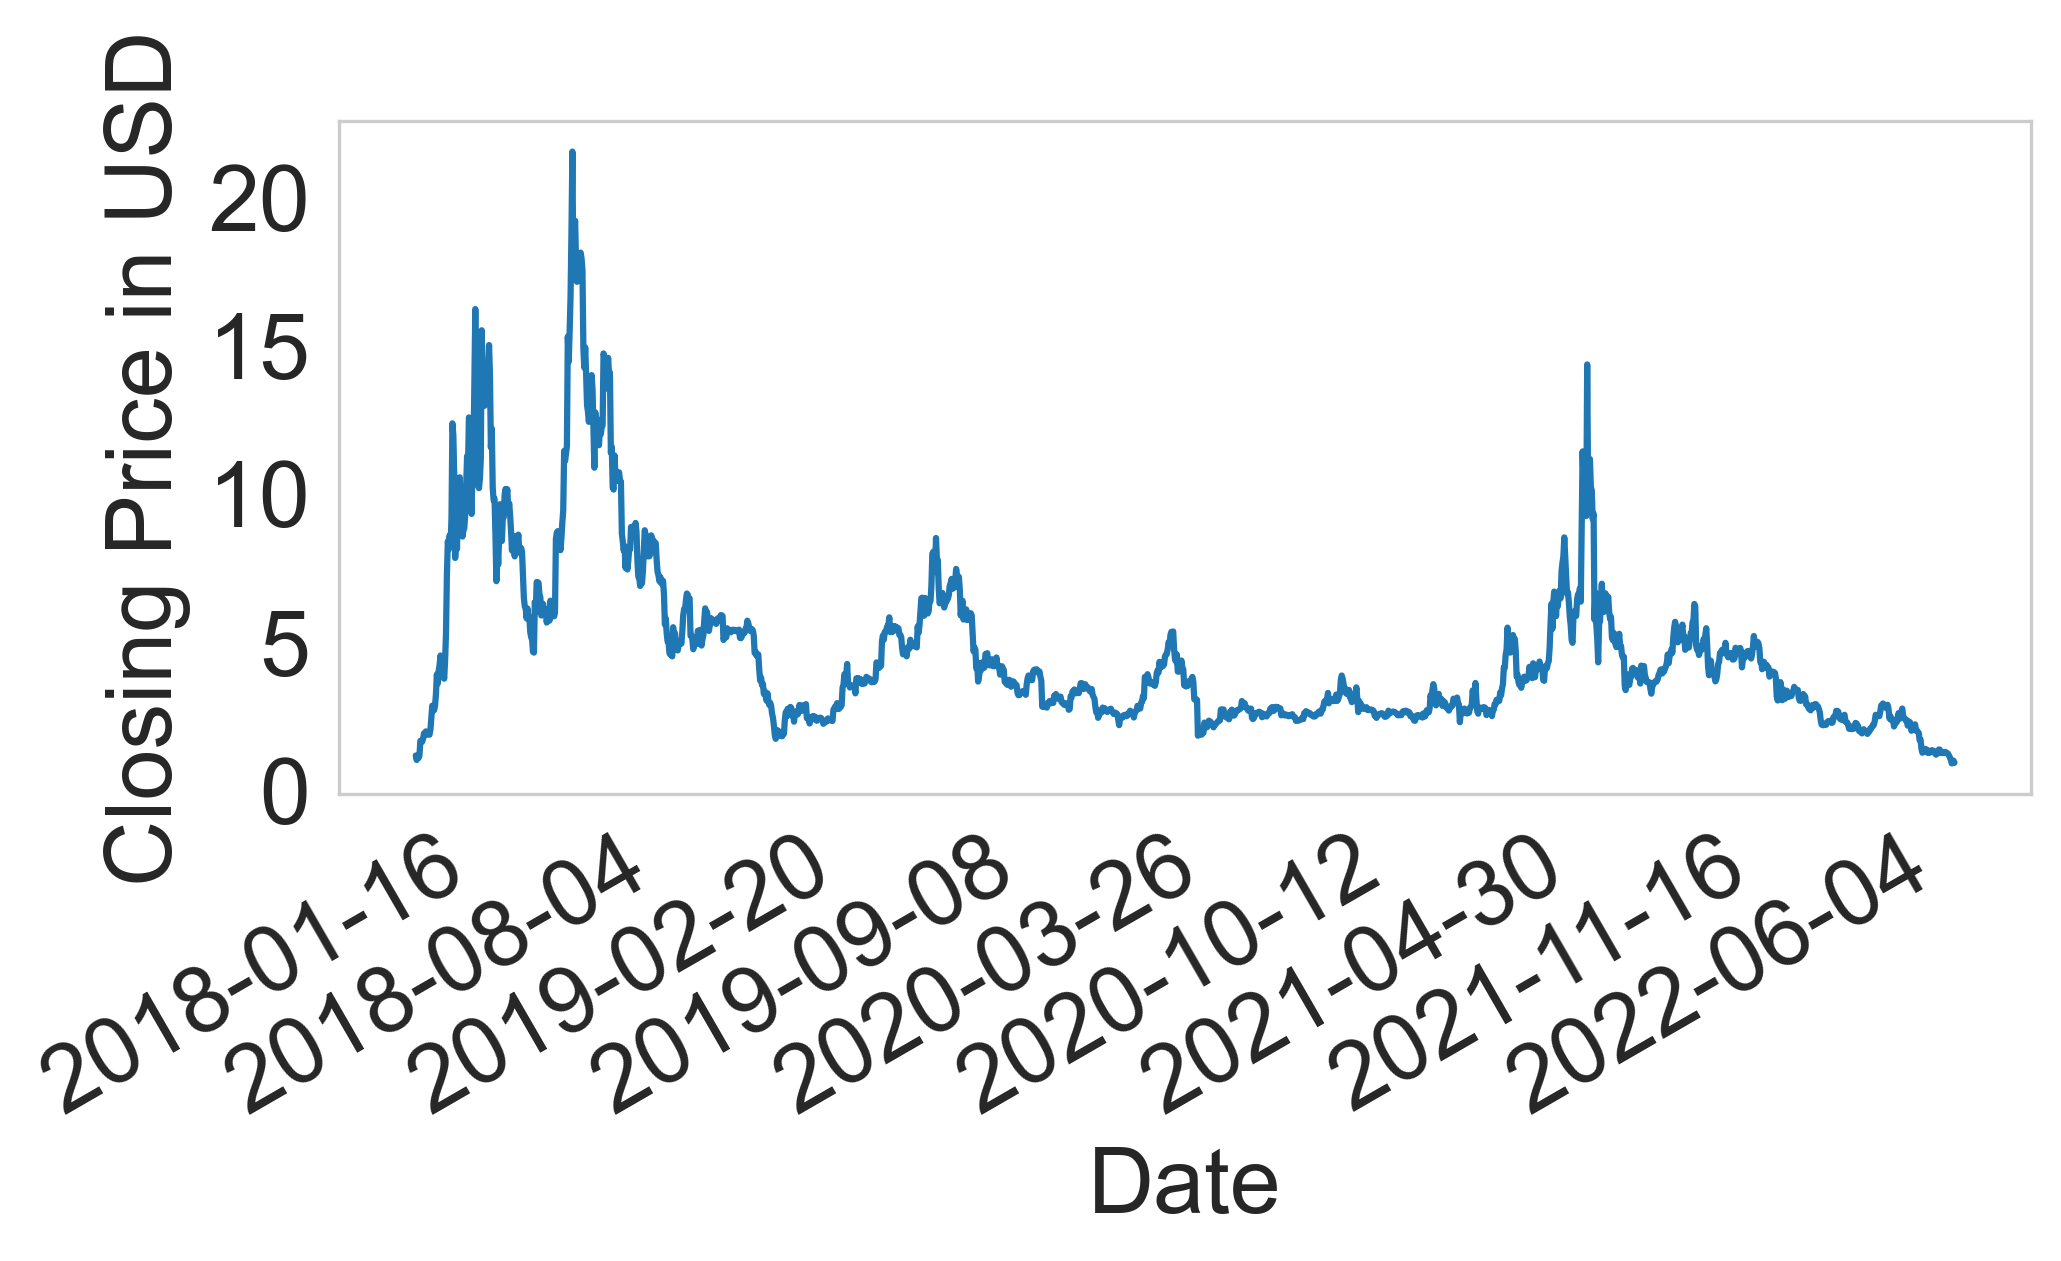

2017-11-09 00:00:00


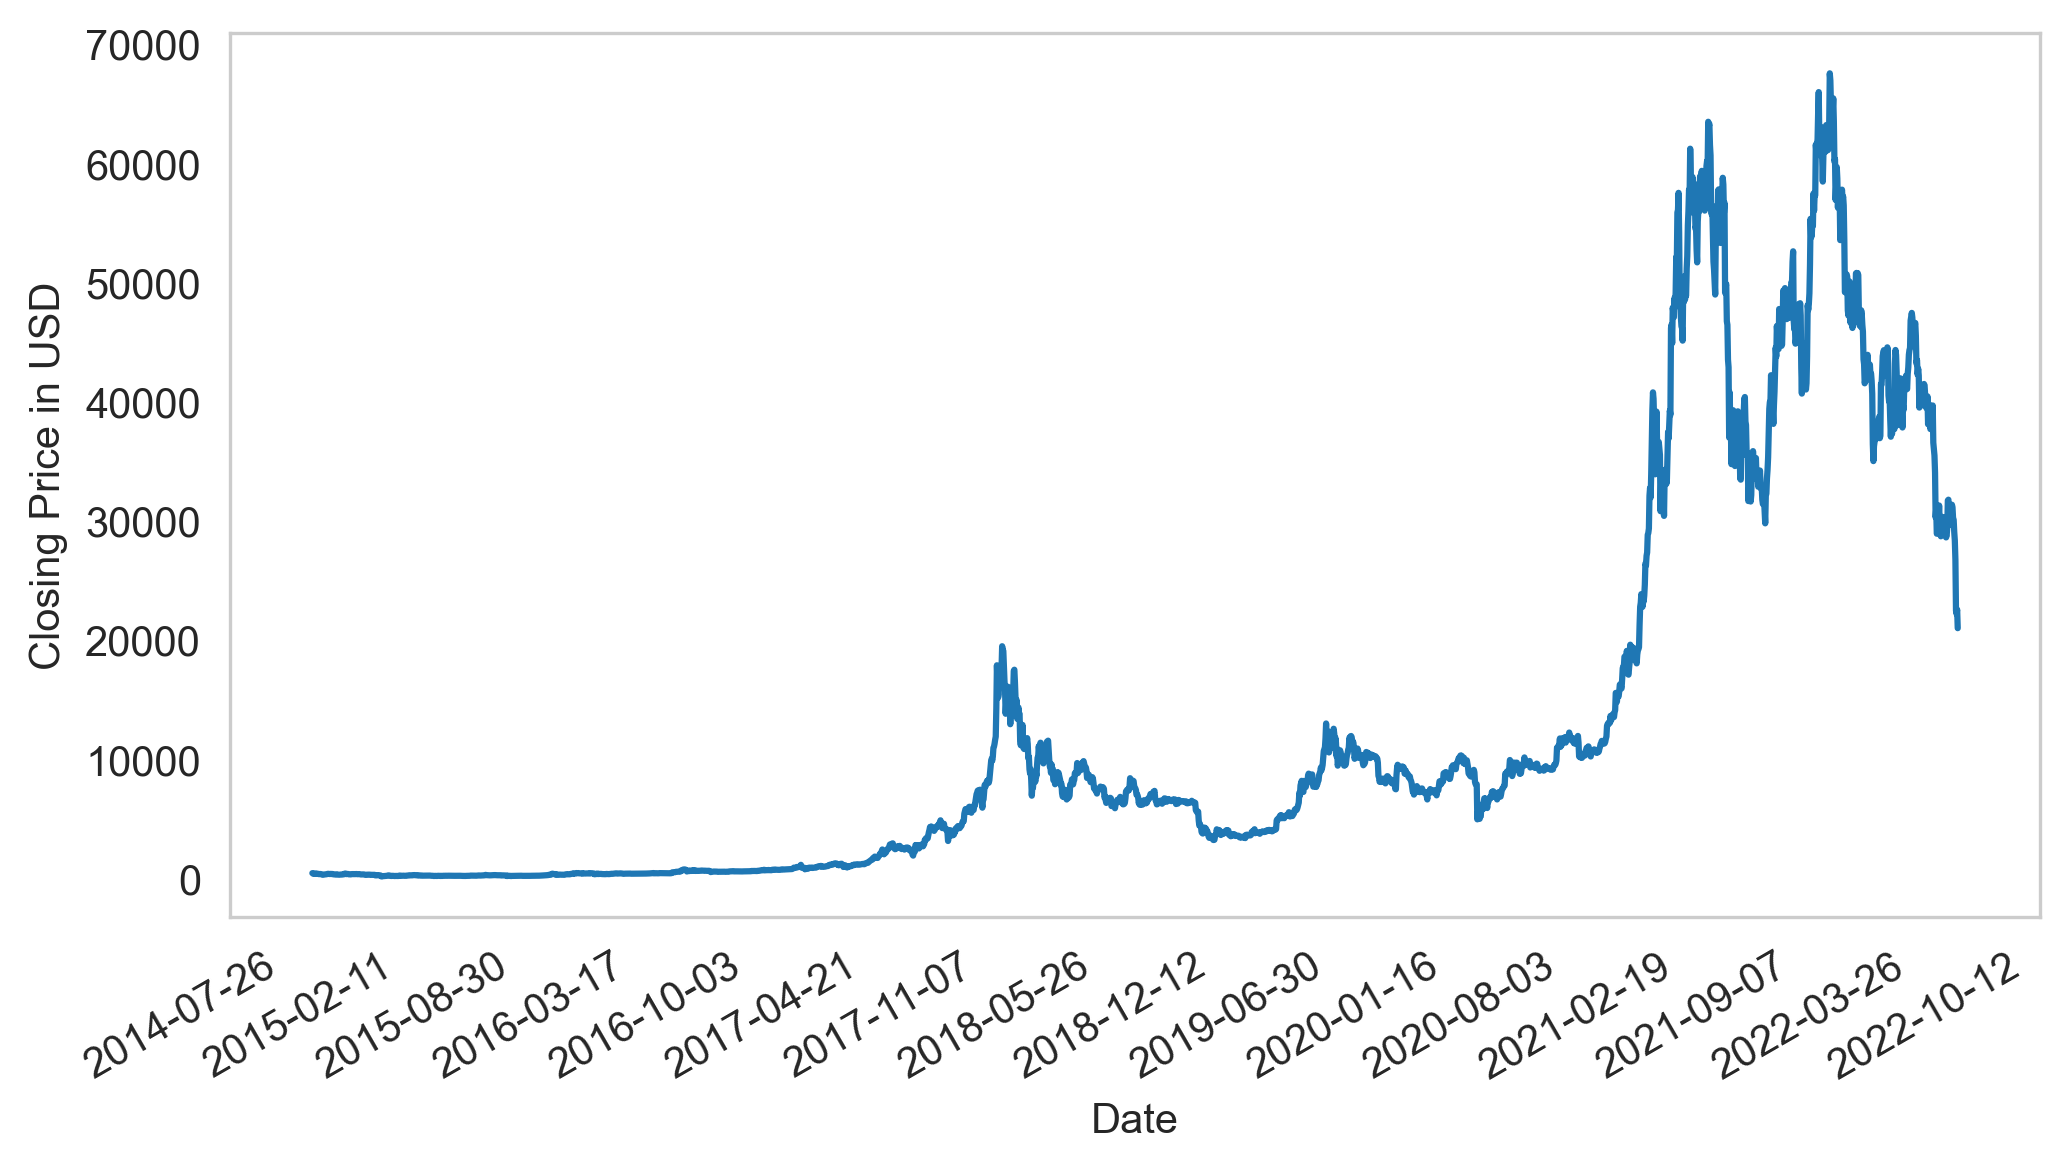

2014-09-17 00:00:00


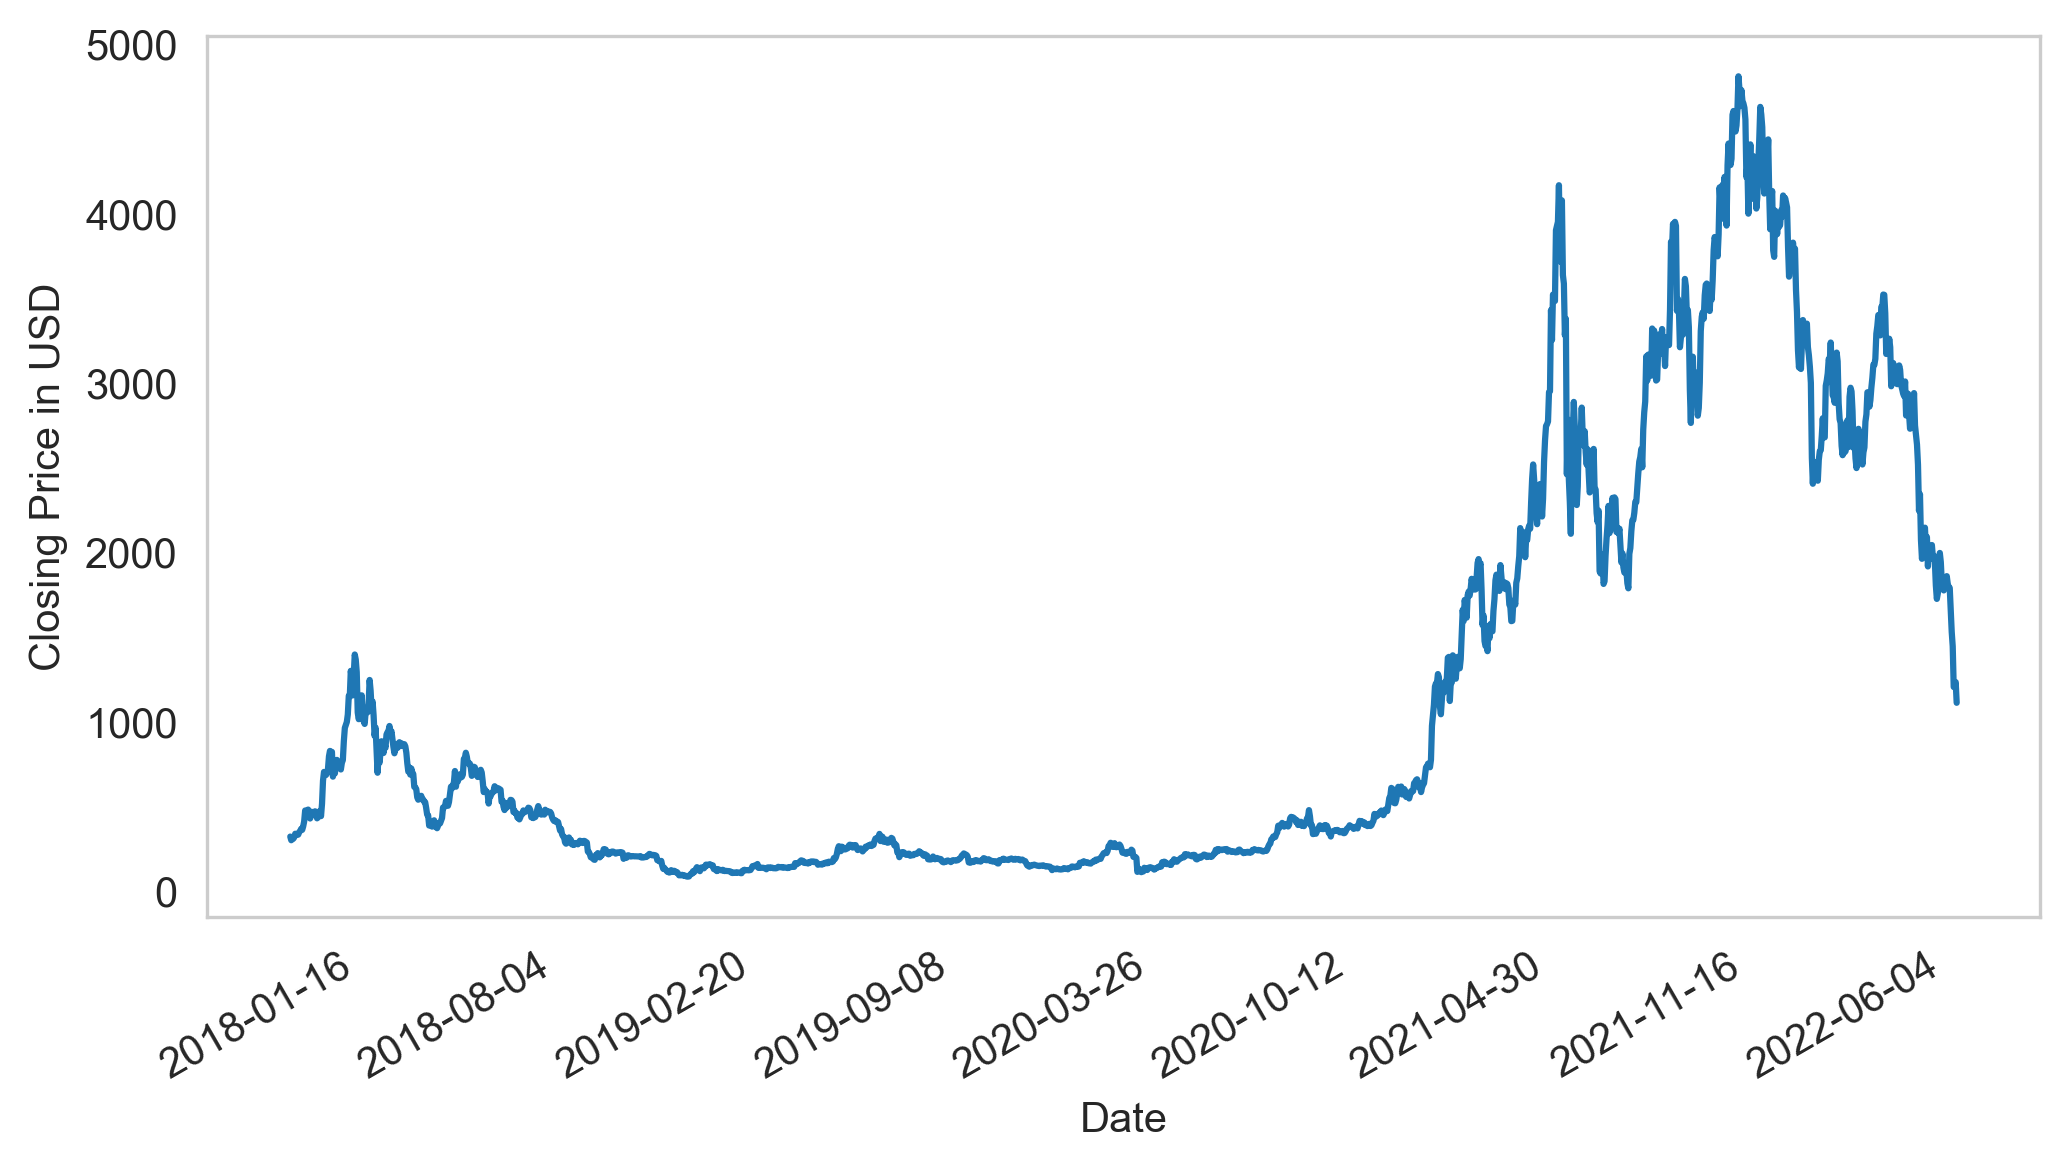

2017-11-09 00:00:00


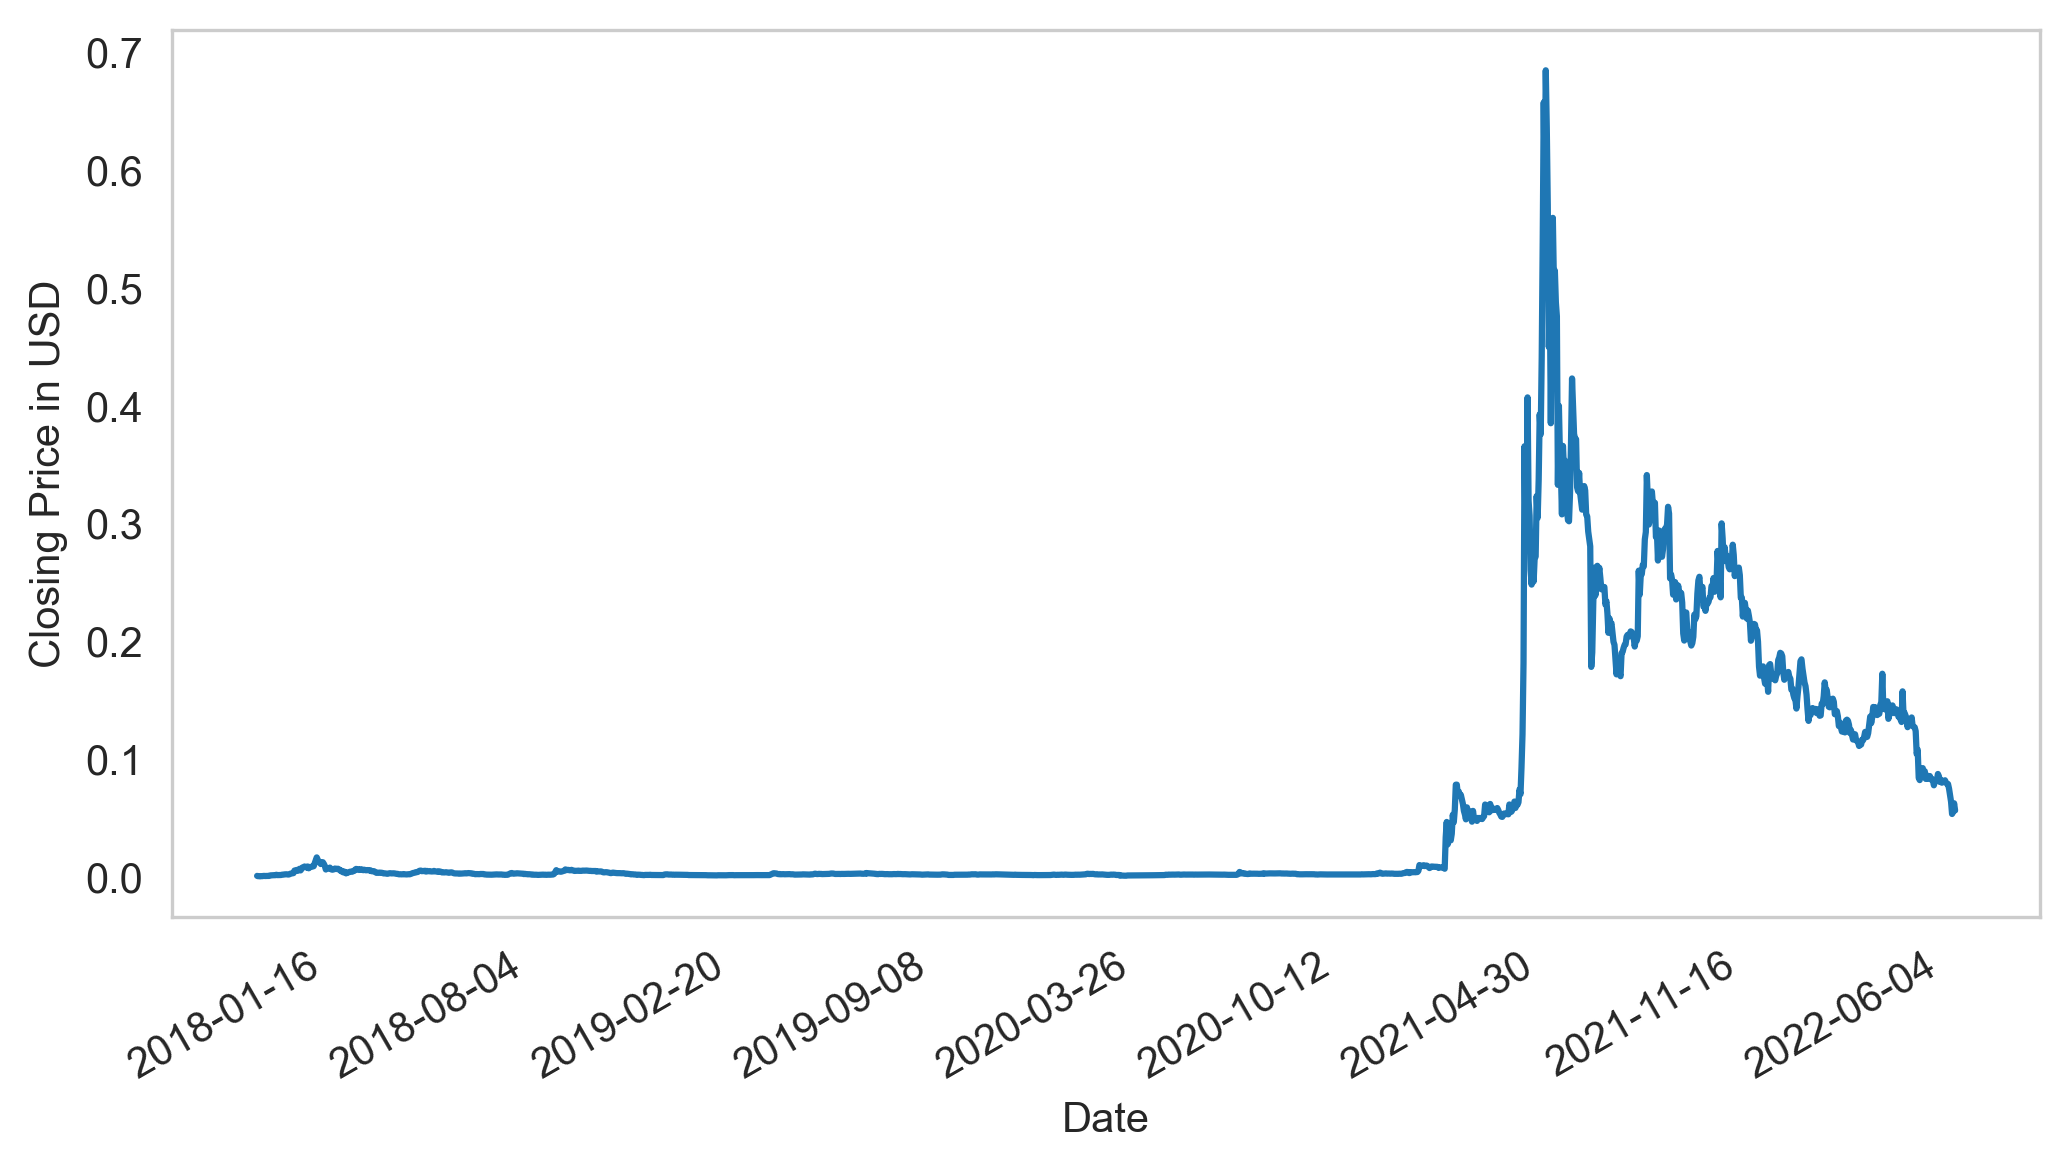

2017-11-09 00:00:00


In [295]:
for crypto in expanded_cryptos:
    ticker_plot(crypto)

In [296]:
def read(filename):
    lines = readfile(filename).splitlines()
    #print(lines)
    content = Shell.find_lines_with(lines, what="csv")
    print(type(content))
    if os_is_windows:
        c = []
        for line in content:
            l = line.split(',',8)[:-1]
            l = ",".join(l)
            c.append(l)
        content = c
    content = "\n".join(content)
    df = pd.DataFrame()
    csv_stream = StringIO(content)
    df = pd.read_csv(csv_stream, sep=",", header=0)
    print(df)
    if os_is_windows:
        df = df.drop(columns=["# csv", "status"])
    else:
        df = df.drop(columns=["# csv", "status", "uname.system", "platform.version"])
    #df.columns = "timer,time,sum,start,tag,msg".split(",","")
    return df

In [297]:
df = read(filename)


<class 'list'>
     # csv                      timer status     time      sum  \
0    # csv          total-EOS-USD-2-0     ok    3.772    3.772   
1    # csv       training-EOS-USD-2-0     ok    2.901    2.901   
2    # csv     prediction-EOS-USD-2-0     ok    0.330    0.330   
3    # csv           RMSE-EOS-USD-2-0     ok    0.000    0.000   
4    # csv          total-EOS-USD-2-1     ok    3.343    3.343   
..     ...                        ...    ...      ...      ...   
795  # csv        RMSE-DOGE-USD-225-3     ok    0.000    0.000   
796  # csv       total-DOGE-USD-225-4     ok  512.003  512.003   
797  # csv    training-DOGE-USD-225-4     ok  511.233  511.233   
798  # csv  prediction-DOGE-USD-225-4     ok    0.344    0.344   
799  # csv        RMSE-DOGE-USD-225-4     ok    0.000    0.000   

                   start       tag                   msg  
0    2022-06-14 02:42:19  DOGE-USD                  None  
1    2022-06-14 02:42:19  DOGE-USD                  None  
2    2022-06-14

In [298]:
df


,timer,time,sum,start,tag,msg
0,total-EOS-USD-2-0,3.772,3.772,2022-06-14 02:42:19,DOGE-USD,None
1,training-EOS-USD-2-0,2.901,2.901,2022-06-14 02:42:19,DOGE-USD,None
2,prediction-EOS-USD-2-0,0.330,0.330,2022-06-14 02:42:22,DOGE-USD,None
3,RMSE-EOS-USD-2-0,0.000,0.000,2022-06-14 02:42:22,DOGE-USD,1.365538425534507
4,total-EOS-USD-2-1,3.343,3.343,2022-06-14 02:42:22,DOGE-USD,None
...,...,...,...,...,...,...
795,RMSE-DOGE-USD-225-3,0.000,0.000,2022-06-14 16:05:53,DOGE-USD,0.010681610015641956
796,total-DOGE-USD-225-4,512.003,512.003,2022-06-14 16:05:53,DOGE-USD,None
797,training-DOGE-USD-225-4,511.233,511.233,2022-06-14 16:05:53,DOGE-USD,None
798,prediction-DOGE-USD-225-4,0.344,0.344,2022-06-14 16:14:25,DOGE-USD,None


In [299]:
# finding the average time per crypto

df_t = df[df['timer'].str.contains('total')]
df_t
print(expanded_cryptos)
list_of_df = []
for crypto in expanded_cryptos:
    list_of_df.append(df_t[df_t['timer'].str.contains(crypto)])
#print(list_of_df)
for iterated_dataframe in list_of_df:
    print(iterated_dataframe['time'].mean())


['EOS-USD', 'BTC-USD', 'ETH-USD', 'DOGE-USD']
186.24068000000003
356.79284
215.48474
216.0043


In [300]:
new_df = pd.DataFrame()
lengths = {}
for crypto in expanded_cryptos:
    data = getdf(crypto)

    length = len(data['Open'])
    lengths[crypto] = length
print(lengths)


{'EOS-USD': 1681, 'BTC-USD': 2830, 'ETH-USD': 1681, 'DOGE-USD': 1681}


In [301]:
#print(expanded_cryptos)
#print('--------------------------------')
#print(df)
#print('done')
#for crypto in expanded_cryptos:
#    df = df[df['tag'].str.contains(crypto)]
#df

In [302]:
df['timer']

0              total-EOS-USD-2-0
1           training-EOS-USD-2-0
2         prediction-EOS-USD-2-0
3               RMSE-EOS-USD-2-0
4              total-EOS-USD-2-1
                 ...            
795          RMSE-DOGE-USD-225-3
796         total-DOGE-USD-225-4
797      training-DOGE-USD-225-4
798    prediction-DOGE-USD-225-4
799          RMSE-DOGE-USD-225-4
Name: timer, Length: 800, dtype: object

In [303]:
rmse = df.copy()
print(rmse[rmse['timer'].str.contains('RMSE')])
rmse = rmse[rmse['timer'].str.contains('RMSE')]
print(rmse)
rmse[['rest', 'name', 'unit', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 4, expand=True)
rmse[['rest', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 2, expand=True)
rmse["rmse"] = rmse["msg"].astype("float")
rmse["epoch"] = rmse["epoch"].astype("int")
rmse = rmse.drop(columns=["time", "sum", "start", "rest", "msg", "unit", "tag"])
rmse

                   timer  time  sum                start       tag  \
3       RMSE-EOS-USD-2-0   0.0  0.0  2022-06-14 02:42:22  DOGE-USD   
7       RMSE-EOS-USD-2-1   0.0  0.0  2022-06-14 02:42:26  DOGE-USD   
11      RMSE-EOS-USD-2-2   0.0  0.0  2022-06-14 02:42:29  DOGE-USD   
15      RMSE-EOS-USD-2-3   0.0  0.0  2022-06-14 02:42:32  DOGE-USD   
19      RMSE-EOS-USD-2-4   0.0  0.0  2022-06-14 02:42:36  DOGE-USD   
..                   ...   ...  ...                  ...       ...   
783  RMSE-DOGE-USD-225-0   0.0  0.0  2022-06-14 15:39:38  DOGE-USD   
787  RMSE-DOGE-USD-225-1   0.0  0.0  2022-06-14 15:47:59  DOGE-USD   
791  RMSE-DOGE-USD-225-2   0.0  0.0  2022-06-14 15:57:18  DOGE-USD   
795  RMSE-DOGE-USD-225-3   0.0  0.0  2022-06-14 16:05:53  DOGE-USD   
799  RMSE-DOGE-USD-225-4   0.0  0.0  2022-06-14 16:14:25  DOGE-USD   

                      msg  
3       1.365538425534507  
7      1.1345566119511719  
11     1.2923574883887423  
15     1.2760709269043584  
19     1.1994741189

,timer,name,epoch,i,rmse
3,RMSE-EOS-USD-2-0,EOS,2,0,1.365538
7,RMSE-EOS-USD-2-1,EOS,2,1,1.134557
11,RMSE-EOS-USD-2-2,EOS,2,2,1.292357
15,RMSE-EOS-USD-2-3,EOS,2,3,1.276071
19,RMSE-EOS-USD-2-4,EOS,2,4,1.199474
...,...,...,...,...,...
783,RMSE-DOGE-USD-225-0,DOGE,225,0,0.010657
787,RMSE-DOGE-USD-225-1,DOGE,225,1,0.015048
791,RMSE-DOGE-USD-225-2,DOGE,225,2,0.007369
795,RMSE-DOGE-USD-225-3,DOGE,225,3,0.010682


C:\Users\Sledgehammer\AppData\Local\Temp\ipykernel_23916\44204967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
C:\Users\Sledgehammer\AppData\Local\Temp\ipykernel_23916\44204967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
C:\Users\Sle

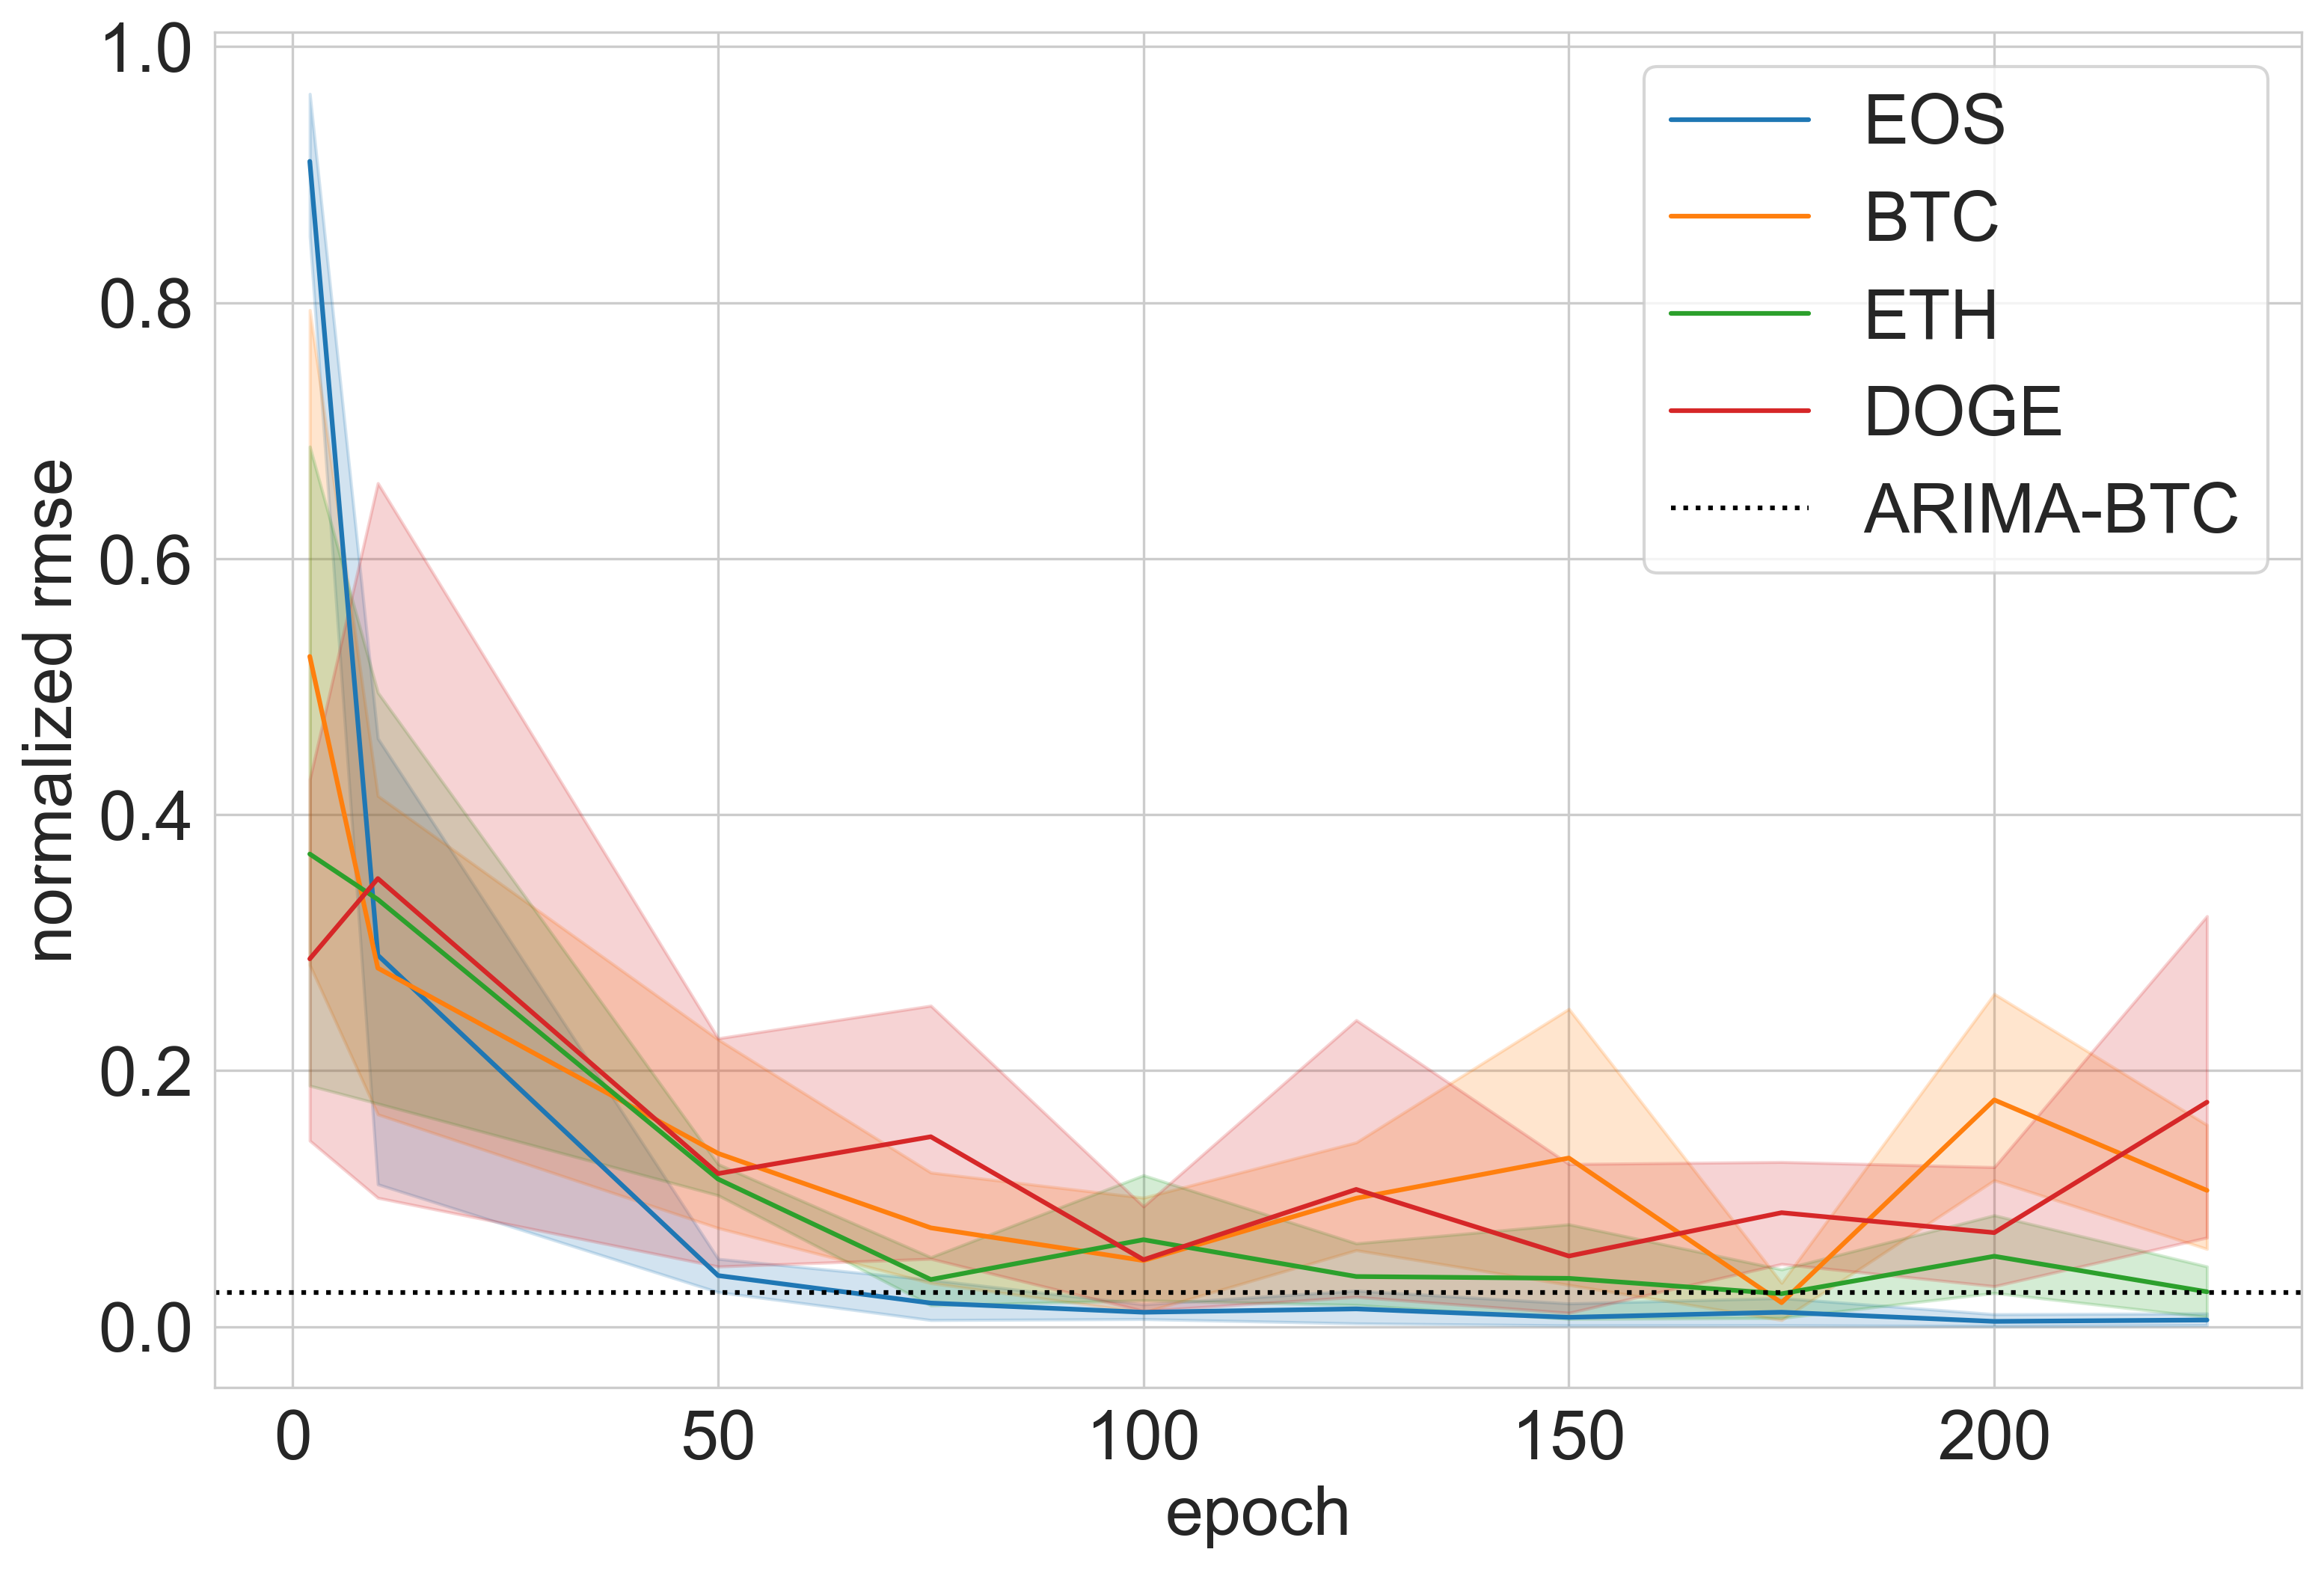

In [304]:
def normalize(df):
    list_of_rmse = []
    normalized_rmse = pd.DataFrame()
    for crypto in list_of_cryptos:
        string_with_crypto = f"column_{crypto}"
        list_of_rmse.append(rmse.loc[rmse['name'] == crypto])

    df_new = pd.DataFrame()
    for dataframe in list_of_rmse:
        dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
    df_new = pd.concat(list_of_rmse)
    return df_new

norm = normalize(rmse)

figure(figsize=(12, 8), dpi=dpi)
plt.rcParams.update({'font.size': 22})
ax = sns.lineplot(data=norm, x="epoch", y="normalized rmse", hue="name")
plt.axhline(y=0.027, color='black', linestyle='dotted', label='ARIMA-BTC')
plt.legend()
plt.savefig(path_expand('graphics/normalized-rmse.pdf'), dpi=dpi)
plt.show()

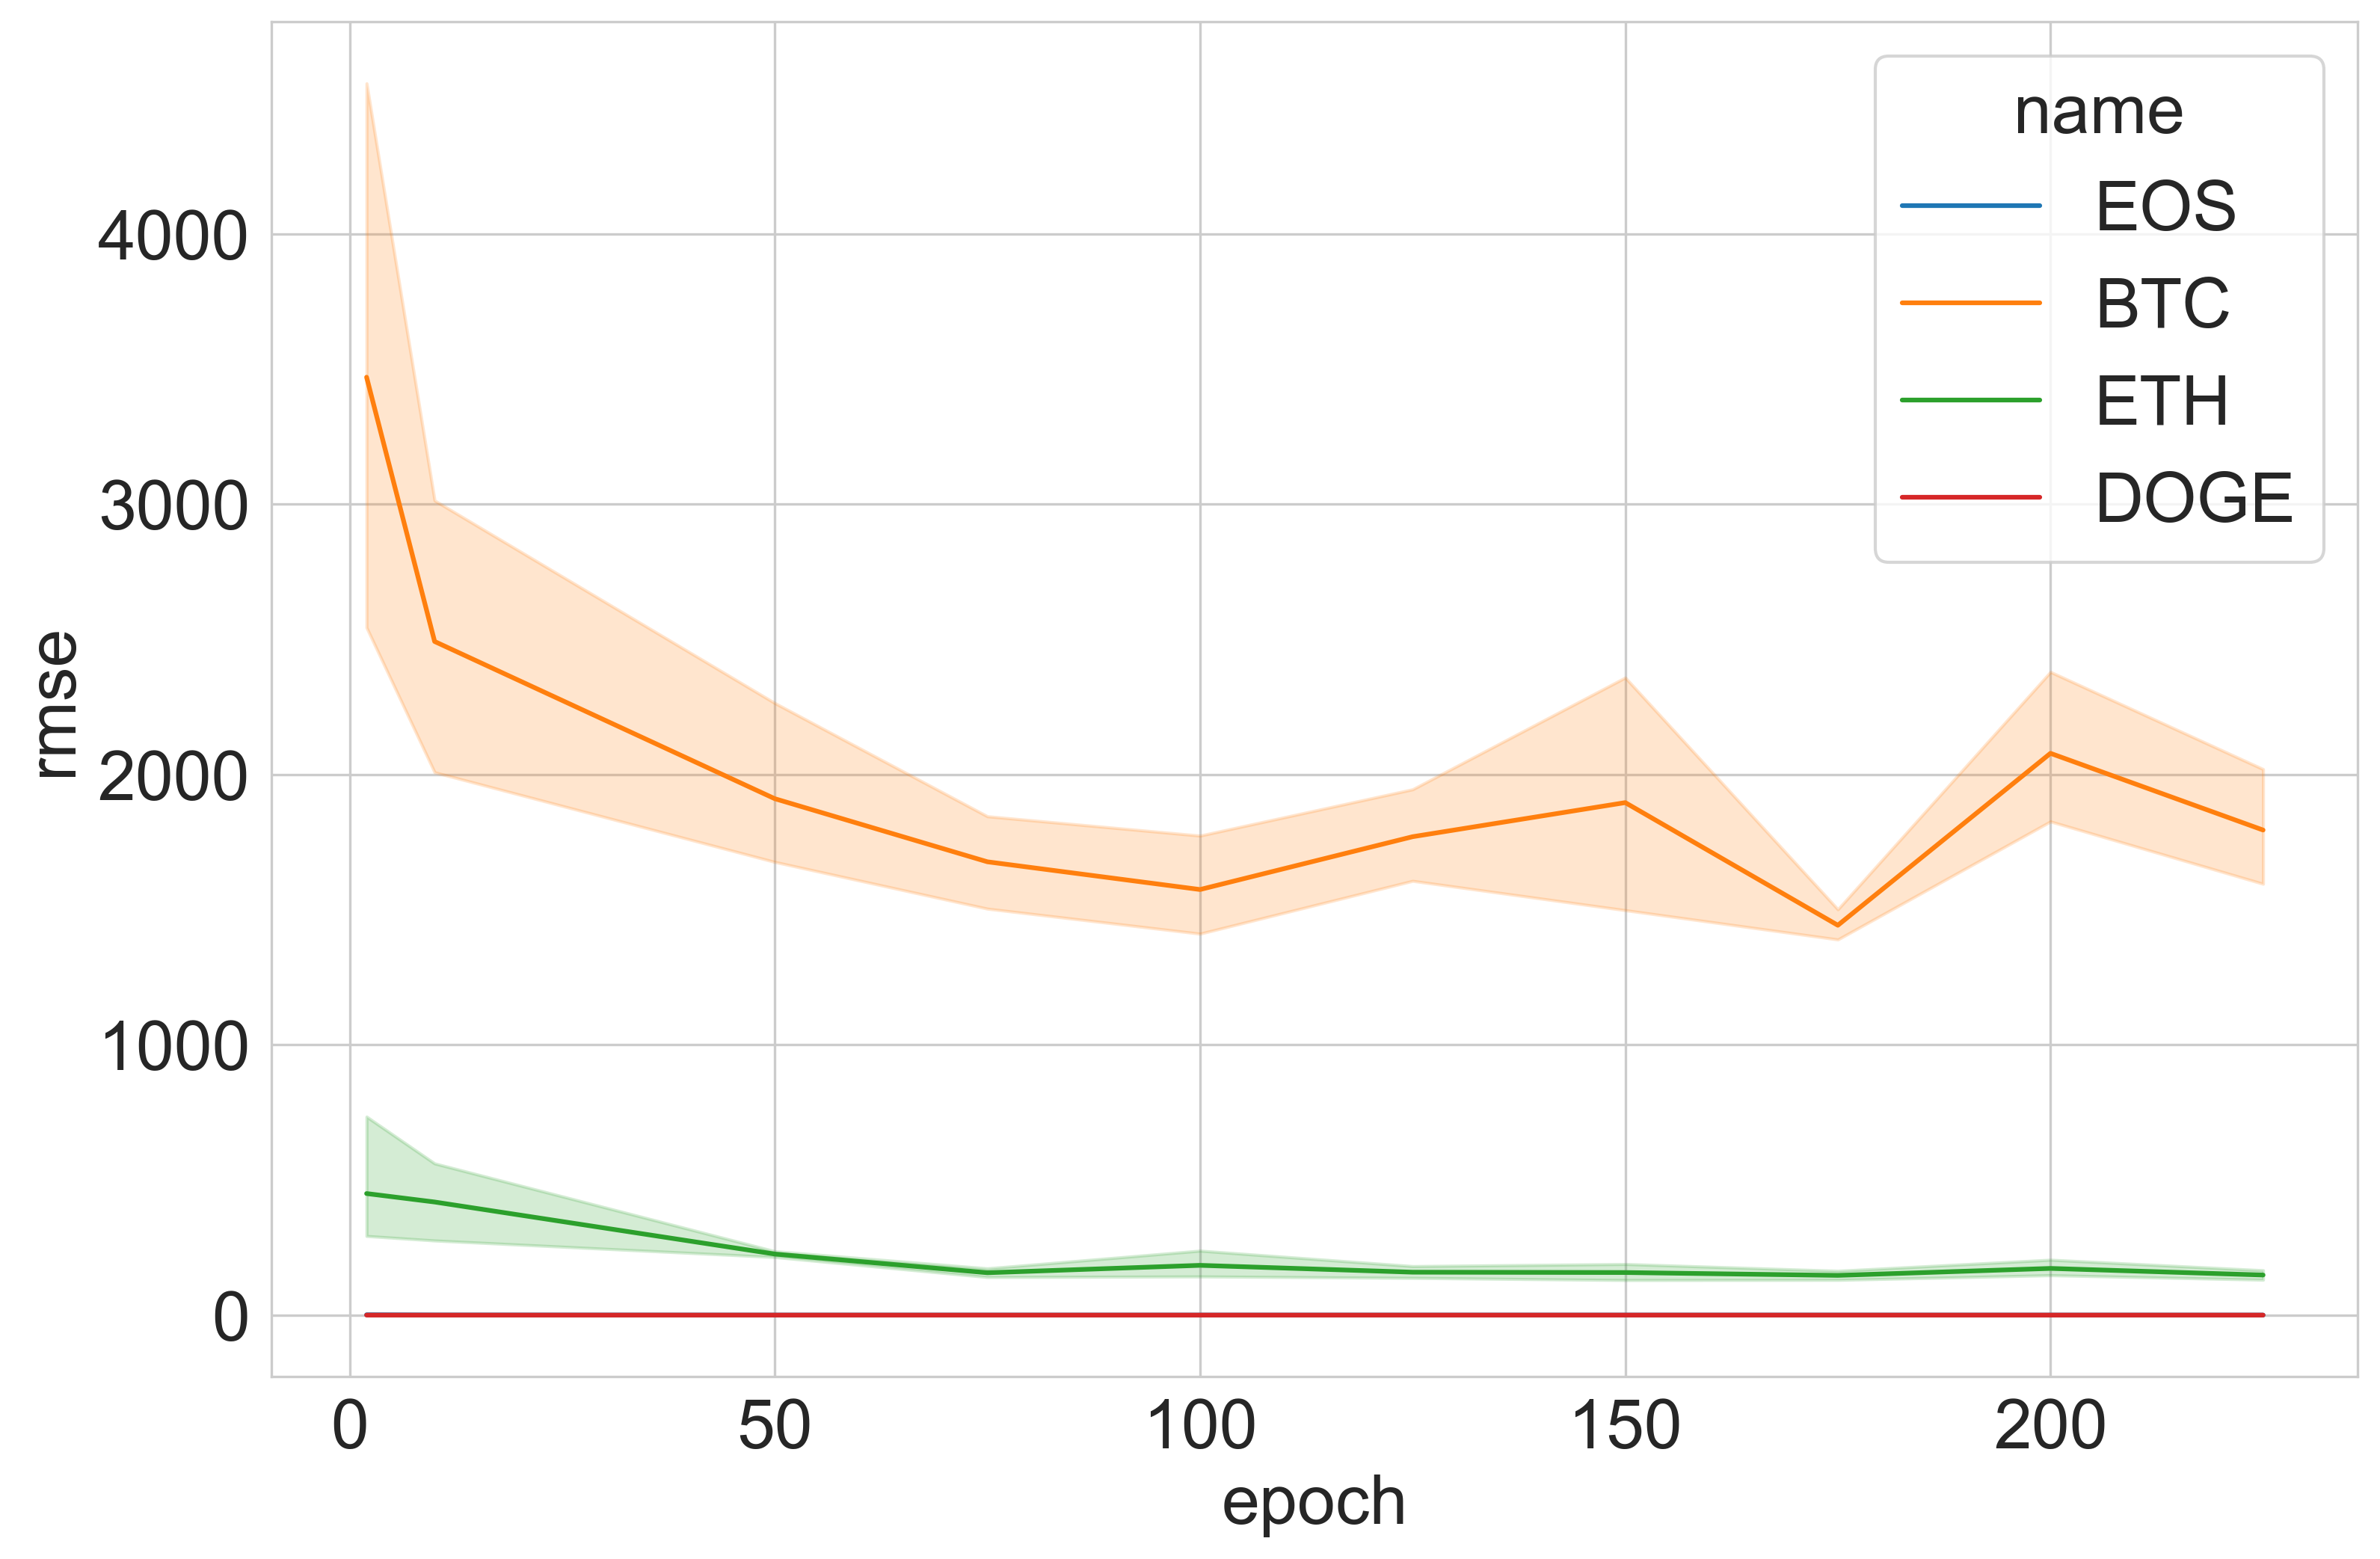

In [305]:
figure(figsize=(12, 8), dpi=dpi)
plt.rcParams.update({'font.size': 22})

ax = sns.lineplot(data=rmse, x="epoch", y="rmse", hue="name")
plt.show()

In [306]:
def timer_plot(t, name):
    df_t = df.copy()
    df_t = df_t[df_t['timer'].str.contains(t)]
    df_t[['rest', 'name', 'unit', 'epoch', 'i', ]] = df_t['timer'].str.rsplit('-', 4, expand=True)
    df_t[['rest', 'epoch', 'i', ]] = df_t['timer'].str.rsplit('-', 2, expand=True)
    df_t[t] = df_t["time"].astype("float")
    df_t["epoch"] = df_t["epoch"].astype("int")
    df_t = df_t.drop(columns=["time", "sum", "start", "rest", "msg", "unit", "tag"])
    df_t[name] = df_t["name"]
    return df_t


In [307]:
def format_plot(dpi=dpi, font=22, y="Time in s", x="Epochs"):
    figure(figsize=(12, 8), dpi=dpi)
    plt.rcParams.update({'font.size': font})
    plt.ylabel(y)
    plt.xlabel(x)


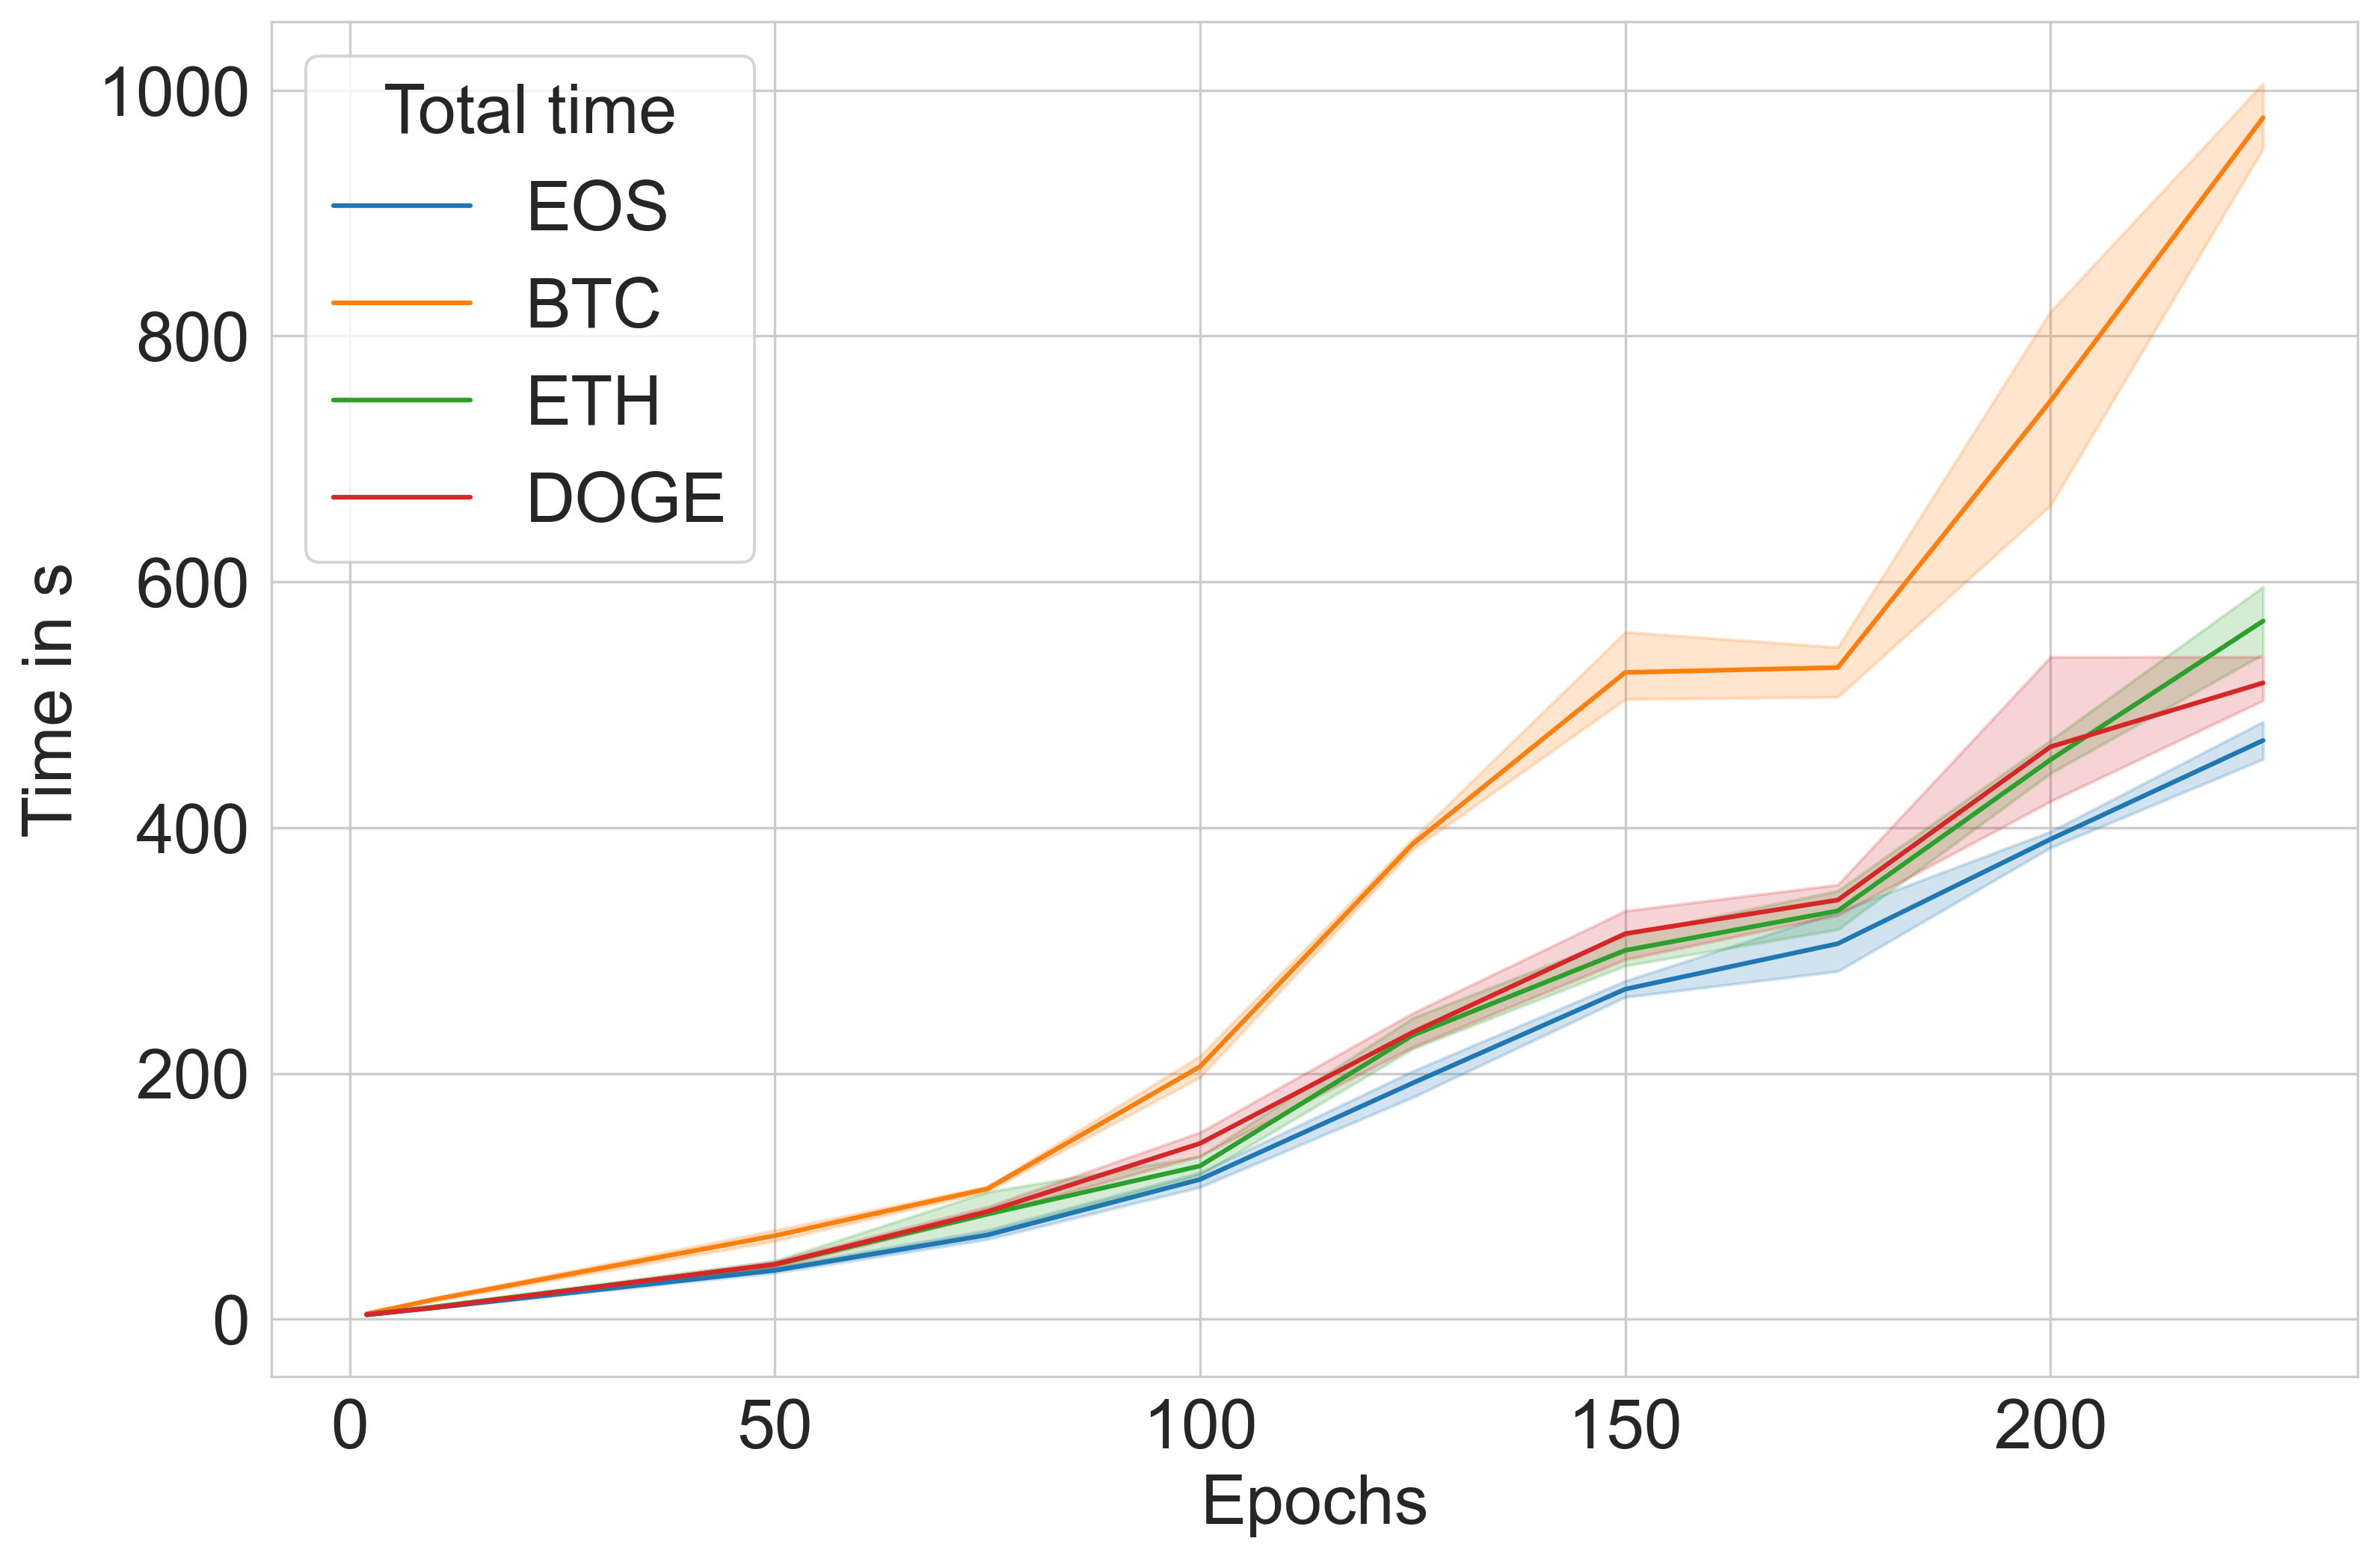

In [308]:
total = timer_plot("total", "Total time")
#total = total["Total time"]
format_plot(dpi=dpi, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=total, x="epoch", y="total", hue="Total time")
plt.savefig(path_expand('graphics/windows-total-runtime.pdf'), dpi=dpi)
plt.show()
# if you take the time in seconds and divide it by the number of days on market, its normalized

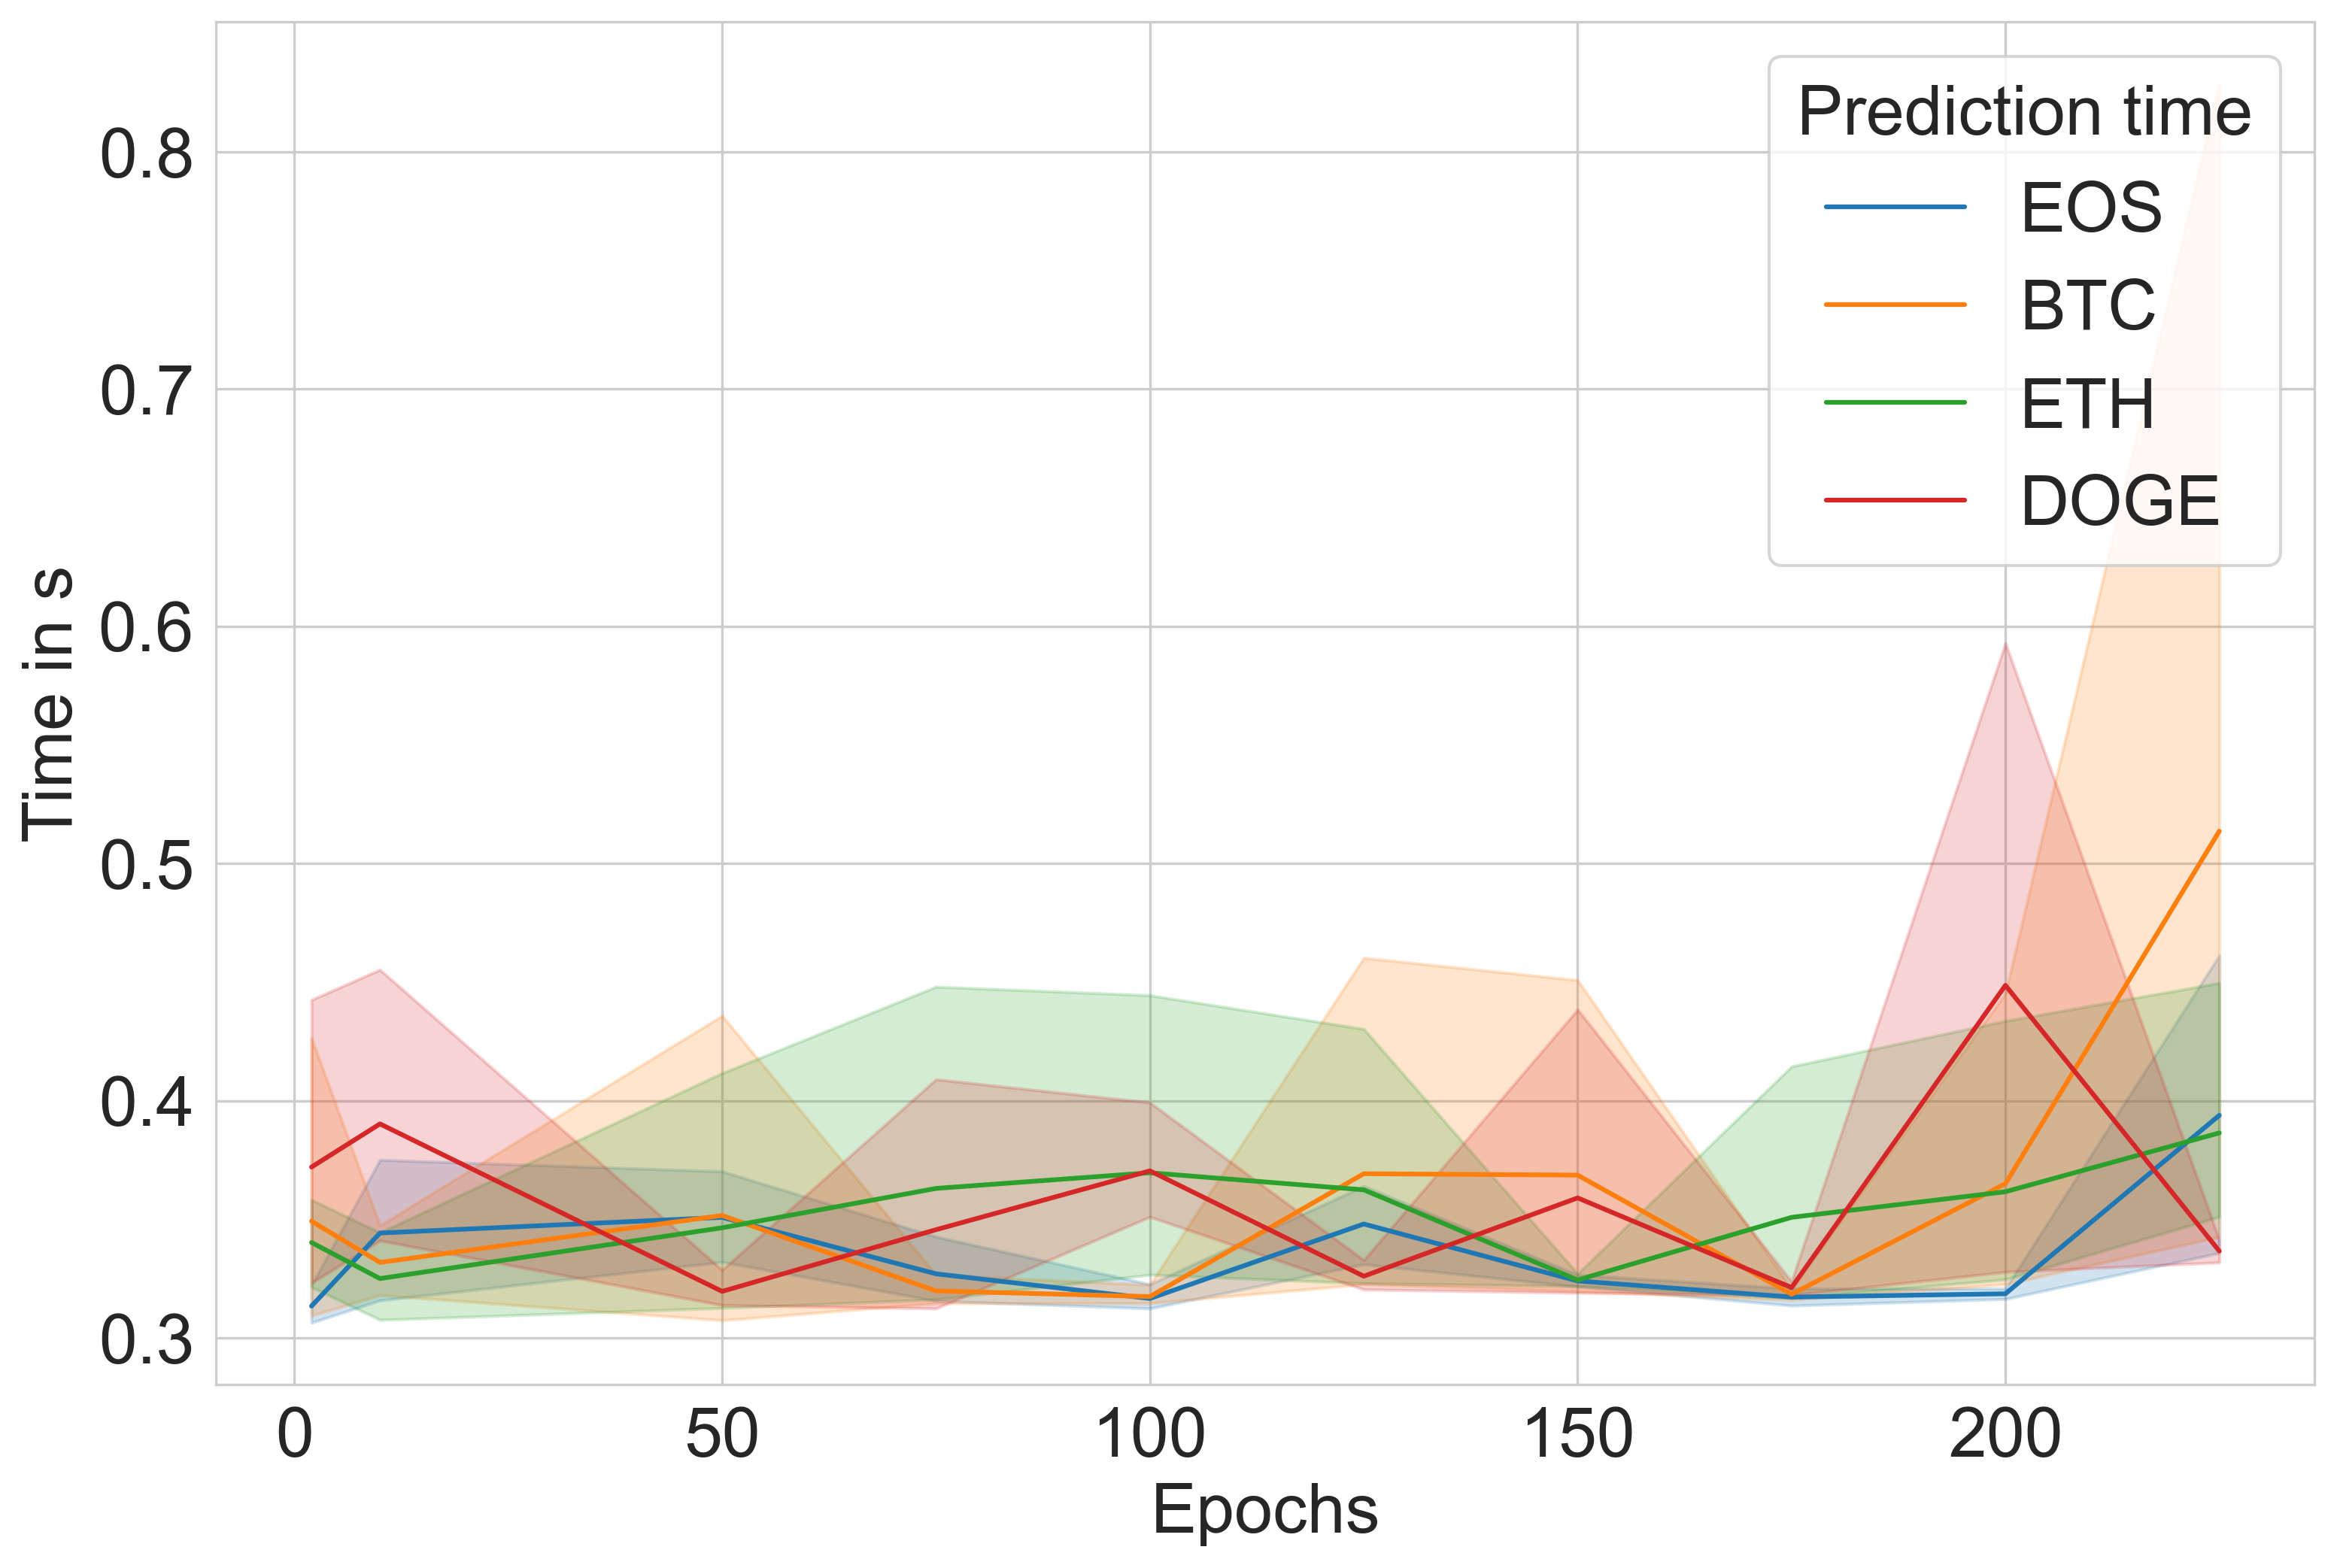

In [309]:
prediction = timer_plot("prediction", "Prediction time")
format_plot(dpi=dpi, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=prediction, x="epoch", y="prediction", hue="Prediction time")
plt.savefig(path_expand('graphics/windows-prediction-time.pdf'), dpi=dpi)
plt.show()

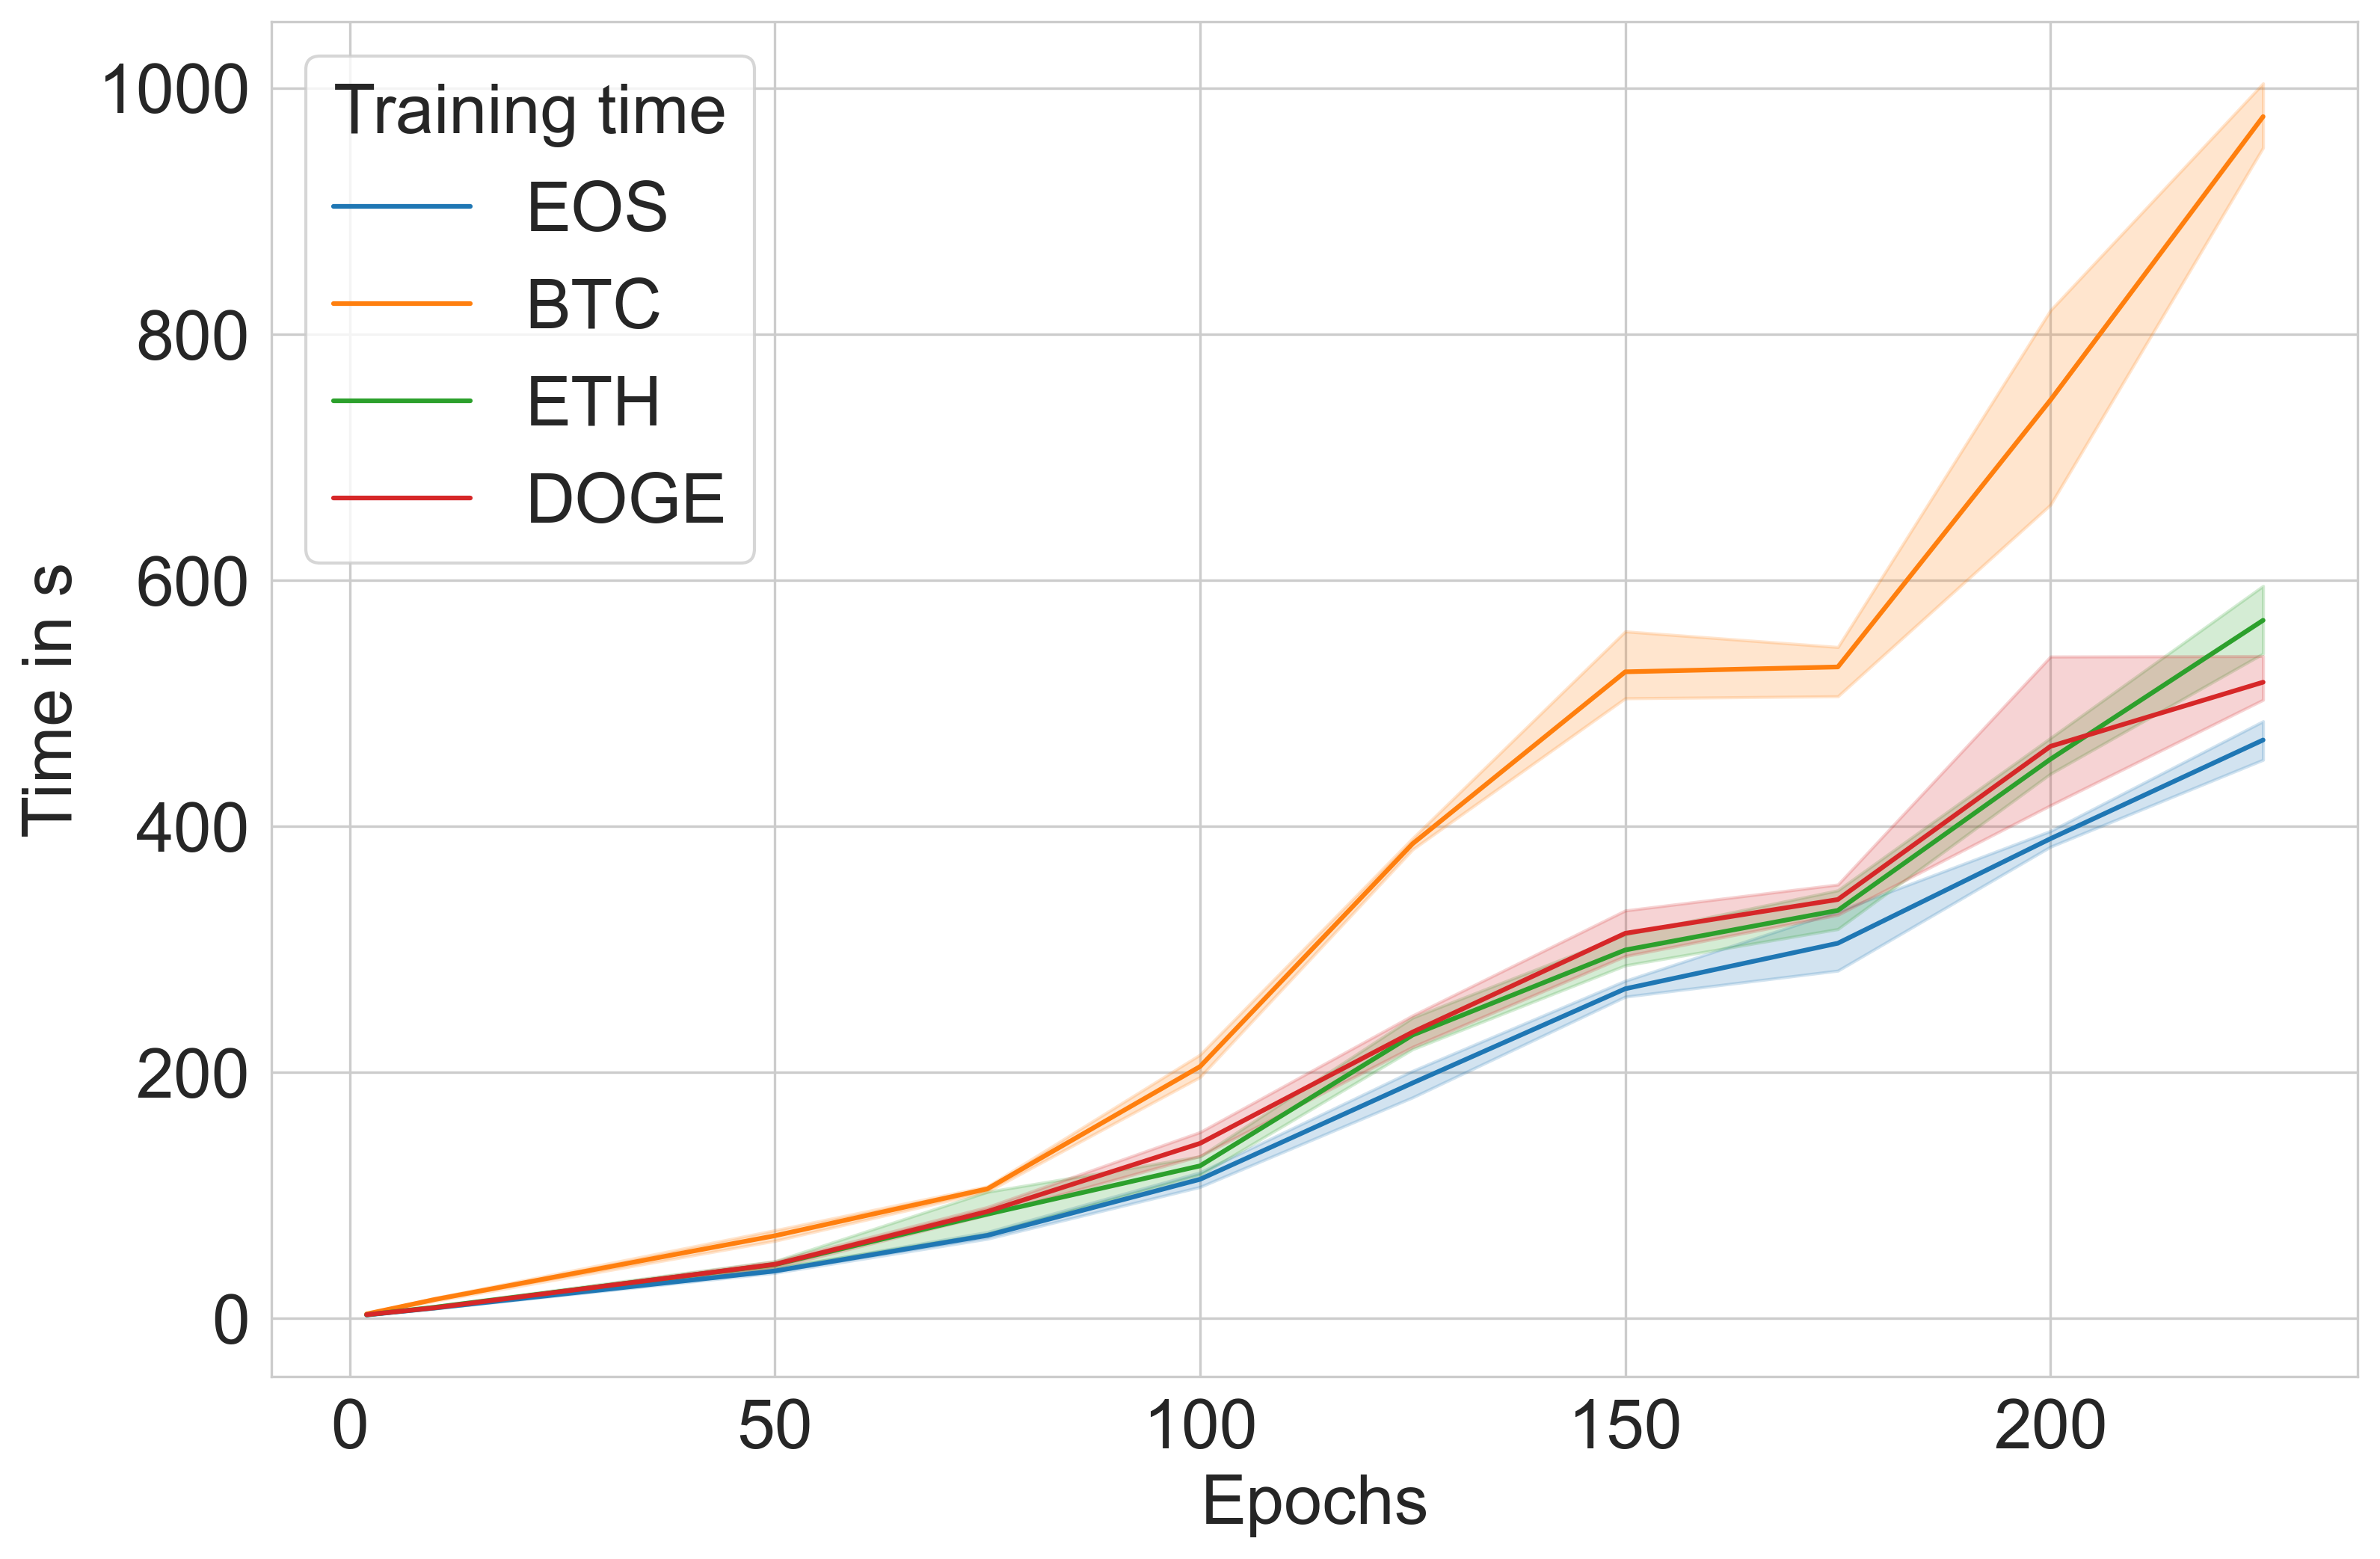

In [310]:
training = timer_plot("training", "Training time")
format_plot(dpi=dpi, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=training, x="epoch", y="training", hue="Training time")
plt.savefig(path_expand('graphics/windows-training-time.pdf'), dpi=dpi)
plt.show()